In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 20
mpl.rcParams['legend.fontsize'] = 17
plt.rcParams['savefig.facecolor']='white'

In [3]:
vk_id = 253802
cg_id = 51880
rs_id = 34102
dw_id = 219889
bmc_id = 37737
mg_id = 226492

In [4]:
url = 'https://stats.espncricinfo.com/ci/engine/player/{}.html?class=3;template=results;type=allround;view=match'

In [5]:
def get_player_info(player_id):
    player_url = url.format(player_id)
    data = pd.read_html(player_url)[3]
    data['Bat1'] = data['Bat1'].str.replace('*', '')
    data['Bat1'] = data['Bat1'].str.replace('-', '0')
    data['Bat1'] = data['Bat1'].str.replace('DNB', '0')
    data['Bat1'] = data['Bat1'].str.replace('TDNB', '0')
    data['Bat1'] = data['Bat1'].str.replace('T0', '0')
    data['Bat1'] = data['Bat1'].astype(float).astype(int)
    return data

In [6]:
vk_data = get_player_info(vk_id)
cg_data = get_player_info(cg_id)
rs_data = get_player_info(rs_id)
dw_data = get_player_info(dw_id)
bmc_data = get_player_info(bmc_id)
mg_data = get_player_info(mg_id)

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


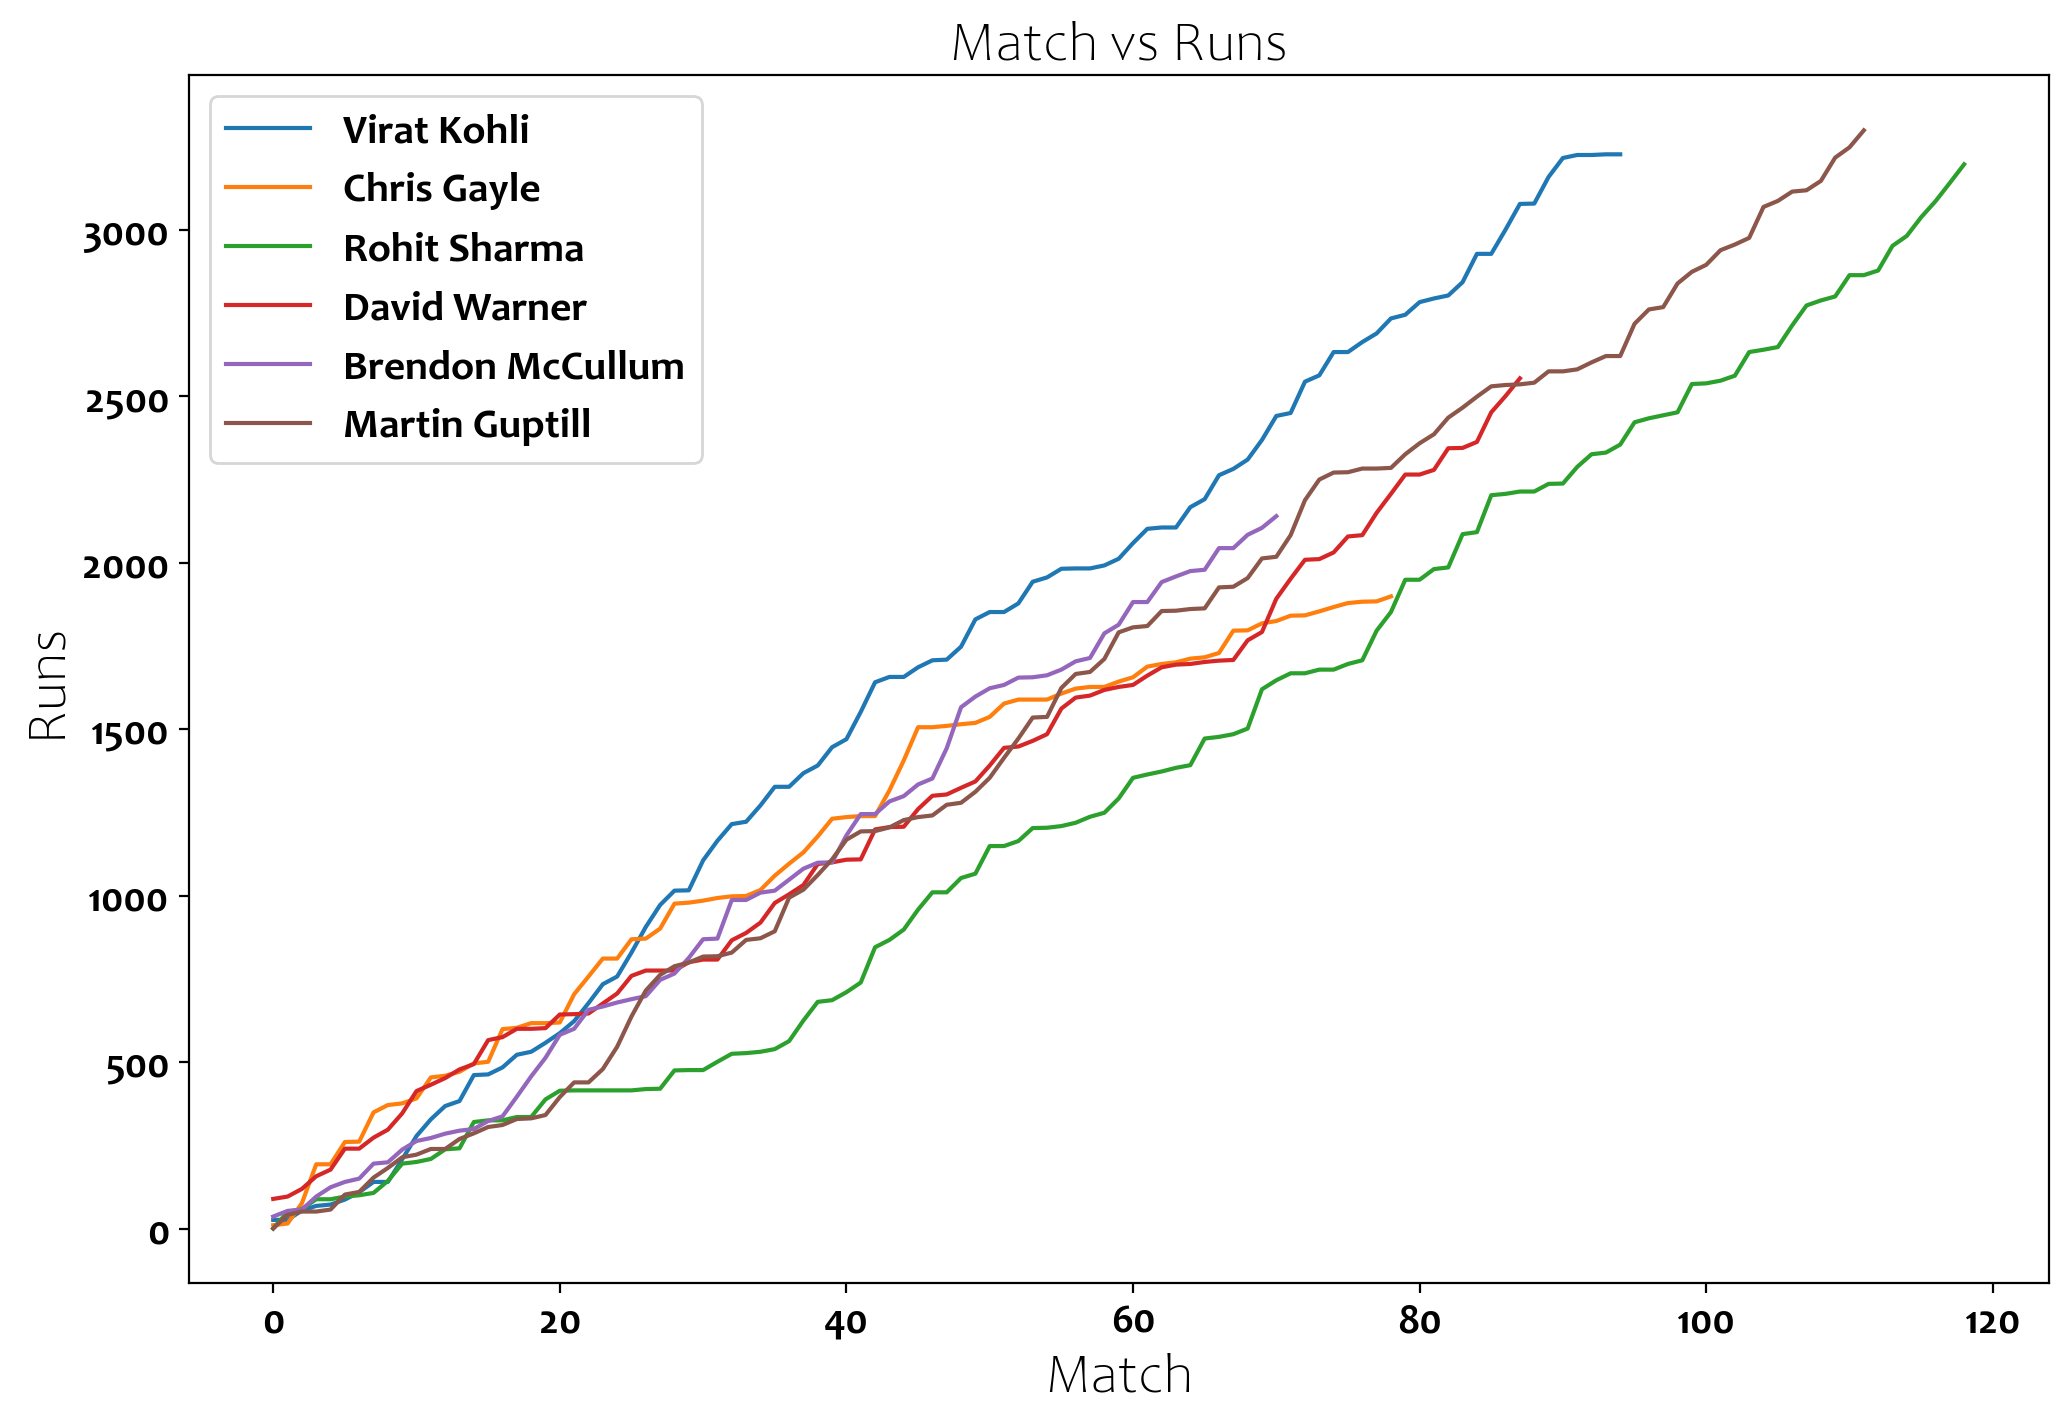

In [7]:
fig = plt.figure(figsize=(12, 8))
fig.set_dpi(200)
plt.plot(vk_data['Bat1'].cumsum())
plt.plot(cg_data['Bat1'].cumsum())
plt.plot(rs_data['Bat1'].cumsum())
plt.plot(dw_data['Bat1'].cumsum())
plt.plot(bmc_data['Bat1'].cumsum())
plt.plot(mg_data['Bat1'].cumsum())
plt.xlabel('Match', fontsize=20)
plt.ylabel('Runs', fontsize=20)
plt.title('Match vs Runs', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.legend(['Virat Kohli', 'Chris Gayle', 'Rohit Sharma', 'David Warner', 'Brendon McCullum', 'Martin Guptill'], fontsize=15)